In [2]:
import pandas as pd

data = pd.read_excel('Superstorecleaned.xlsx')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

C:\Users\Owner\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data.shape

(51290, 21)

In [5]:
data.isnull().sum()

Row ID            0
Order ID          0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Product ID        0
Product Name      0
Sub-Category      0
Category          0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
City              0
Region            0
Order_Date        0
Ship_Date         0
Postal Code       0
dtype: int64

In [6]:
data['Sub-Category'].nunique()

17

In [7]:
data['Segment'].unique()

array(['Home Office', 'Consumer', 'Corporate'], dtype=object)

In [8]:
data.isna().sum().to_frame('Null Values')


,Null Values
Row ID,0
Order ID,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Product ID,0
Product Name,0
Sub-Category,0
Category,0


In [9]:
data = data.drop(columns=['Postal Code','Row ID','Shipping Cost'], axis=1)
data.head()

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Product ID,Product Name,Sub-Category,Category,Sales,Quantity,Discount,Profit,Order Priority,City,Region,Order_Date,Ship_Date
0,IN-2017-CA120551-42816,Standard Class,CA-120551,Cathy Armstrong,Home Office,FUR-BO-4861,"Ikea Library with Doors, Mobile",Bookcases,Furniture,731.82,2,0.0,102.42,Medium,Henderson,South,2020-03-22,2020-03-29
1,ID-2015-BD116051-42248,Second Class,BD-116051,Brian Dahlen,Consumer,OFF-SU-2988,"Acme Scissors, Easy Grip",Supplies,Office Supplies,243.54,9,0.0,104.49,Medium,Henderson,South,2018-09-01,2018-09-04
2,IN-2017-CA120551-42816,Standard Class,CA-120551,Cathy Armstrong,Home Office,TEC-MA-4211,"Epson Receipt Printer, White",Machines,Technology,346.32,3,0.0,13.77,Medium,Los Angeles,West,2020-03-22,2020-03-29
3,IN-2017-CA120551-42816,Standard Class,CA-120551,Cathy Armstrong,Home Office,FUR-FU-5726,"Rubbermaid Door Stop, Erganomic",Furnishings,Furniture,169.68,4,0.0,79.68,Medium,Fort Lauderdale,South,2020-03-22,2020-03-29
4,ID-2015-BD116051-42248,Second Class,BD-116051,Brian Dahlen,Consumer,OFF-EN-3664,"Cameo Interoffice Envelope, with clear poly wi...",Envelopes,Office Supplies,203.88,4,0.0,24.36,Medium,Fort Lauderdale,South,2018-09-01,2018-09-04


In [10]:
data.describe()


,Sales,Quantity,Discount,Profit
count,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982
std,487.565361,2.278766,0.212280,174.340972
min,0.444000,1.000000,0.000000,-6599.978000
25%,30.758625,2.000000,0.000000,0.000000
50%,85.053000,3.000000,0.000000,9.240000
75%,251.053200,5.000000,0.200000,36.810000
max,22638.480000,14.000000,0.850000,8399.976000


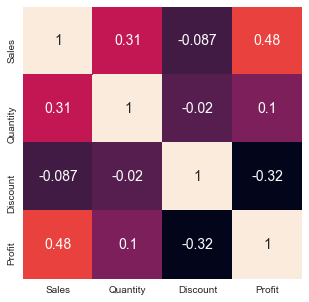

In [11]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(), annot=True, cbar=False, annot_kws={'size':14})
plt.show()

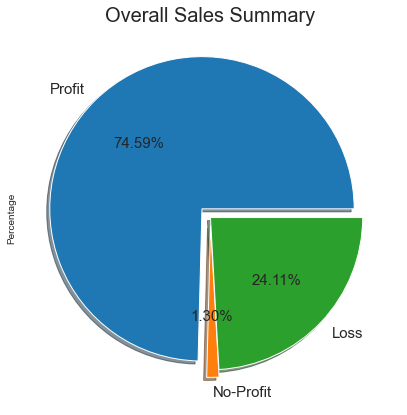

In [12]:
summary = pd.DataFrame({'Profit':data.Quantity[data.Profit > 0].sum(), 
                        'No-Profit':data.Quantity[data.Profit == 0].sum(), 
                        'Loss':data.Quantity[(data.Profit) < 0].sum()},
                       index={'Count'}).T
plt.title('Overall Sales Summary', fontsize=20)
summary.Count.plot.pie(autopct='%1.2f%%',figsize=(7,7), label='Percentage', 
                       textprops = {"fontsize":15}, shadow=True, explode=(0.08,0.05,0))
plt.show()

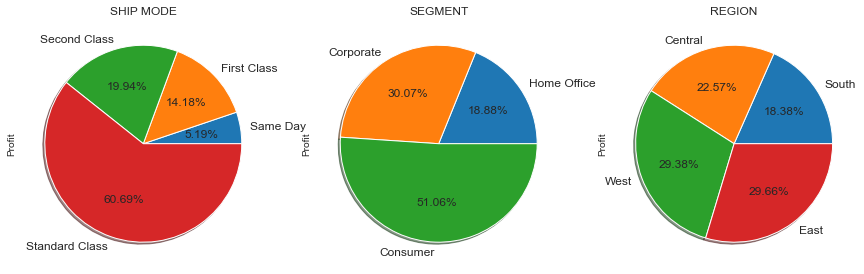

In [13]:
prof_S = pd.DataFrame(data.groupby('Ship Mode').sum()).sort_values('Profit')
prof_G = pd.DataFrame(data.groupby('Segment').sum()).sort_values('Profit')
prof_R = pd.DataFrame(data.groupby('Region').sum()).sort_values('Profit')
fig, ax = plt.subplots(1,3, figsize=(15,6))
ax[0].set_title('SHIP MODE', fontsize=12)
ax[1].set_title('SEGMENT', fontsize=12)
ax[2].set_title('REGION', fontsize=12)
prof_S.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=True, ax=ax[0])
prof_G.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=True, ax=ax[1])
prof_R.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=True, ax=ax[2])
plt.show()


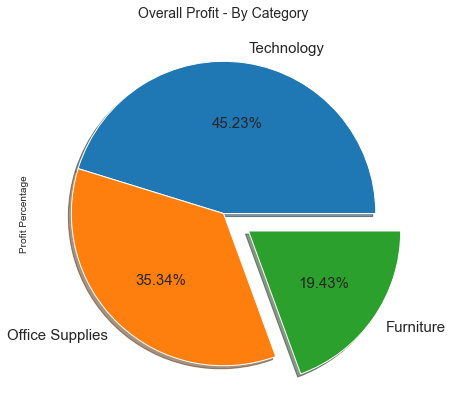

In [14]:
cat = np.round(data.groupby('Category').sum(), decimals=2).sort_values('Profit', ascending=False)
plt.title('Overall Profit - By Category', fontsize=14)
cat.Profit.plot.pie(autopct='%1.2f%%', figsize=(7,7), label='Profit Percentage', 
                    textprops = {"fontsize":15}, explode=(0, 0, 0.2), shadow=True)
plt.show()

Category-wise Summary


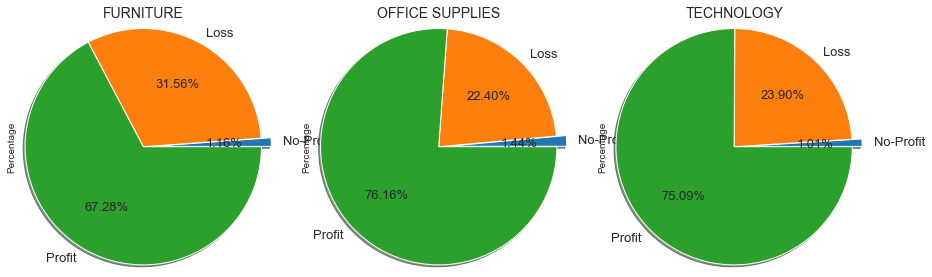

In [15]:
summ_offc = pd.DataFrame({'Profit':data[(data.Category == 'Office Supplies') 
                                        & (data.Profit > 0)].count()[0], 
                        'No-Profit':data[(data.Category == 'Office Supplies') 
                                         & (data.Profit == 0)].count()[0], 
                        'Loss':data[(data.Category == 'Office Supplies') 
                                    & (data.Profit < 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
summ_furn = pd.DataFrame({'Profit':data[(data.Category == 'Furniture') 
                                        & (data.Profit > 0)].count()[0], 
                        'No-Profit':data[(data.Category == 'Furniture') 
                                         & (data.Profit == 0)].count()[0], 
                        'Loss':data[(data.Category == 'Furniture') 
                                    & (data.Profit < 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
summ_tech = pd.DataFrame({'Profit':data[(data.Category == 'Technology') 
                                        & (data.Profit > 0)].count()[0], 
                        'No-Profit':data[(data.Category == 'Technology') 
                                         & (data.Profit == 0)].count()[0], 
                        'Loss':data[(data.Category == 'Technology') 
                                    & (data.Profit < 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
fig, ax = plt.subplots(1,3, figsize=(15,5))
print('Category-wise Summary')
ax[0].set_title('FURNITURE', fontsize=14)
ax[1].set_title('OFFICE SUPPLIES', fontsize=14)
ax[2].set_title('TECHNOLOGY', fontsize=14)
summ_furn.Percentage.plot.pie(autopct='%1.2f%%', radius= 1.2, explode=(0.1, 0, 0), 
                              textprops = {"fontsize":13}, shadow=True, ax=ax[0])
summ_offc.Percentage.plot.pie(autopct='%1.2f%%', radius= 1.2, explode=(0.1, 0, 0), 
                              textprops = {"fontsize":13}, shadow=True, ax=ax[1])
summ_tech.Percentage.plot.pie(autopct='%1.2f%%', radius= 1.2, explode=(0.1, 0, 0), 
                              textprops = {"fontsize":13}, shadow=True, ax=ax[2])
plt.show()

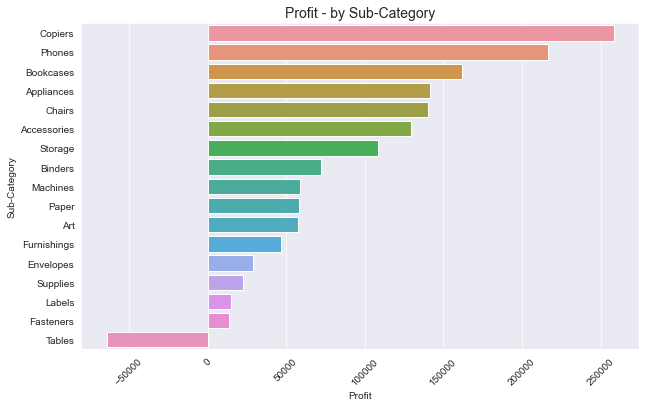

In [16]:
sub = np.round(data.groupby('Sub-Category').sum(), decimals=2).sort_values('Profit', ascending=False)
plt.figure(figsize=(10,6))
plt.title('Profit - by Sub-Category', fontsize=14)
sns.barplot(sub.Profit, sub.index)
plt.xticks(rotation=45)
plt.show()

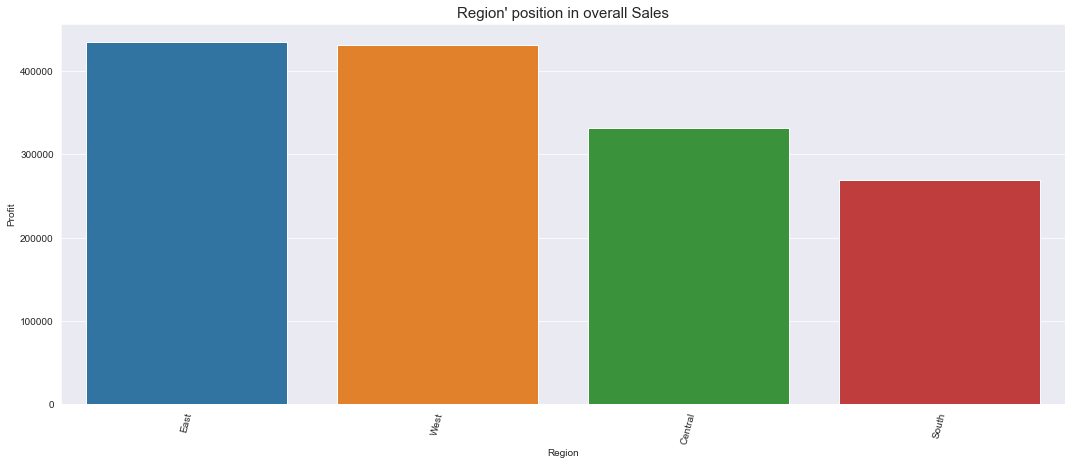

In [17]:
state_P = pd.DataFrame(data.groupby('Region').sum()).sort_values('Profit', ascending=False)
plt.figure(figsize=(18,7))
plt.title("Region' position in overall Sales", fontsize=15)
sns.barplot(state_P.index, state_P.Profit)
plt.xticks(rotation=75)
plt.show()

REGION-WISE SALES SUMMARY


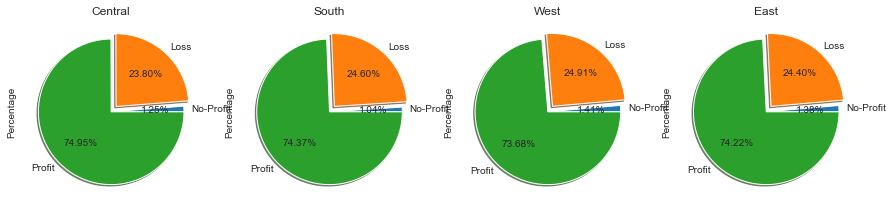

In [18]:
summ_cent = pd.DataFrame({'Profit':data[(data.Region == 'Central') 
                                        & (data.Profit > 0)].count()[0], 
                        'No-Profit':data[(data.Region == 'Central') 
                                         & (data.Profit == 0)].count()[0], 
                        'Loss':data[(data.Region == 'Central') 
                                    & (-data.Profit > 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
summ_sou = pd.DataFrame({'Profit':data[(data.Region == 'South') 
                                        & (data.Profit > 0)].count()[0], 
                        'No-Profit':data[(data.Region == 'South') 
                                         & (data.Profit == 0)].count()[0], 
                        'Loss':data[(data.Region == 'South') 
                                    & (-data.Profit > 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
summ_west = pd.DataFrame({'Profit':data[(data.Region == 'West') 
                                        & (data.Profit > 0)].count()[0], 
                        'No-Profit':data[(data.Region == 'West') 
                                         & (data.Profit == 0)].count()[0], 
                        'Loss':data[(data.Region == 'West') 
                                    & (-data.Profit > 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
summ_east = pd.DataFrame({'Profit':data[(data.Region == 'East') 
                                        & (data.Profit > 0)].count()[0], 
                        'No-Profit':data[(data.Region == 'East') 
                                         & (data.Profit == 0)].count()[0], 
                        'Loss':data[(data.Region == 'East') 
                                    & (-data.Profit > 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
fig, ax = plt.subplots(1,4, figsize=(15,5))
print('REGION-WISE SALES SUMMARY')
ax[0].set_title('Central')
ax[1].set_title('South')
ax[2].set_title('West')
ax[3].set_title('East')
summ_cent.Percentage.plot.pie(autopct='%1.2f%%', ax=ax[0], explode=(0,0.1,0), shadow=True)
summ_sou.Percentage.plot.pie(autopct='%1.2f%%', ax=ax[1], explode=(0,0.1,0), shadow=True)
summ_west.Percentage.plot.pie(autopct='%1.2f%%', ax=ax[2], explode=(0,0.1,0), shadow=True)
summ_east.Percentage.plot.pie(autopct='%1.2f%%', ax=ax[3], explode=(0,0.1,0), shadow=True)
plt.show()

In [19]:
sales_data=data[['Order_Date','Category','Sales']]
sales_data

,Order_Date,Category,Sales
0,2020-03-22,Furniture,731.820
1,2018-09-01,Office Supplies,243.540
2,2020-03-22,Technology,346.320
3,2020-03-22,Furniture,169.680
4,2018-09-01,Office Supplies,203.880
...,...,...,...
51285,2017-03-20,Office Supplies,9.612
51286,2020-05-21,Office Supplies,4.104
51287,2019-05-09,Office Supplies,7.749
51288,2018-02-05,Technology,104.364


In [20]:
sales_data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [21]:
tech_sales_data = sales_data[(sales_data['Category'] == "Technology")]
tech_sales_data

,Order_Date,Category,Sales
2,2020-03-22,Technology,346.320
8,2019-09-24,Technology,1168.440
9,2020-12-11,Technology,500.940
12,2018-09-28,Technology,427.410
16,2018-09-28,Technology,412.950
...,...,...,...
51221,2018-06-07,Technology,21.960
51224,2020-03-24,Technology,21.501
51246,2018-06-04,Technology,154.440
51276,2020-11-24,Technology,14.832


In [22]:
tech_sales_data['date']=pd.to_datetime(tech_sales_data['Order_Date'])
tech_sales_data['year'],tech_sales_data['month'] = tech_sales_data['date'].dt.year , tech_sales_data['date'].dt.month
tech_sales_data

,Order_Date,Category,Sales,date,year,month
2,2020-03-22,Technology,346.320,2020-03-22,2020,3
8,2019-09-24,Technology,1168.440,2019-09-24,2019,9
9,2020-12-11,Technology,500.940,2020-12-11,2020,12
12,2018-09-28,Technology,427.410,2018-09-28,2018,9
16,2018-09-28,Technology,412.950,2018-09-28,2018,9
...,...,...,...,...,...,...
51221,2018-06-07,Technology,21.960,2018-06-07,2018,6
51224,2020-03-24,Technology,21.501,2020-03-24,2020,3
51246,2018-06-04,Technology,154.440,2018-06-04,2018,6
51276,2020-11-24,Technology,14.832,2020-11-24,2020,11


In [23]:
mean_sales=tech_sales_data.groupby(['year', 'month'],as_index=False).mean()
means_sales_train = mean_sales[(mean_sales['year']!=2015)]
means_sales_train

,year,month,Sales
0,2017,1,461.313558
1,2017,2,417.835065
2,2017,3,620.296764
3,2017,4,380.807512
4,2017,5,422.504929
5,2017,6,378.109895
6,2017,7,381.425629
7,2017,8,489.060470
8,2017,9,539.685789
9,2017,10,501.974785


In [34]:
from statsmodels.tsa.arima_model import ARMA
sales = means_sales_train['Sales'].tolist()
model = ARMA(sales, order=(0, 10))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(sales), len(sales)+11)
print(yhat)

[455.31442104 419.80349129 450.06365565 468.20986988 438.04673791
 500.26553857 468.29992601 510.45803543 477.50274054 472.41484225
 465.82216269 465.82216269]


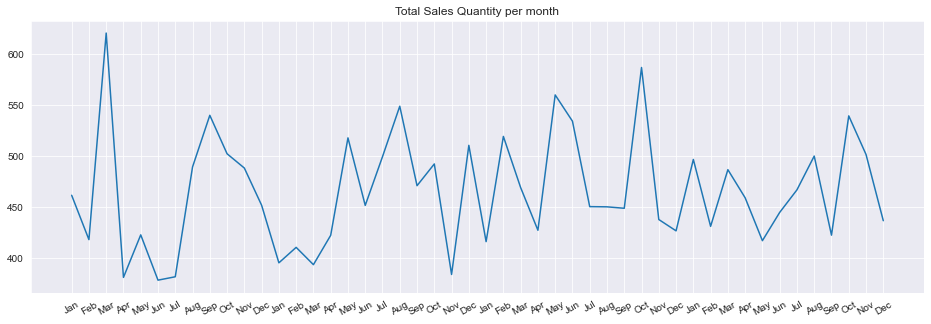

In [36]:

import matplotlib.pyplot as plt
SalesQuantitiy=pd.crosstab(columns=means_sales_train['year'],
            index=means_sales_train['month'],
            values=means_sales_train['Sales'],
            aggfunc='sum').melt()['value']

MonthNames=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4

# Plotting the sales
%matplotlib inline
SalesQuantitiy.plot(kind='line', figsize=(16,5), title='Total Sales Quantity per month')
# Setting the x-axis labels
plotLabels=plt.xticks(np.arange(0,48,1),MonthNames, rotation=30)

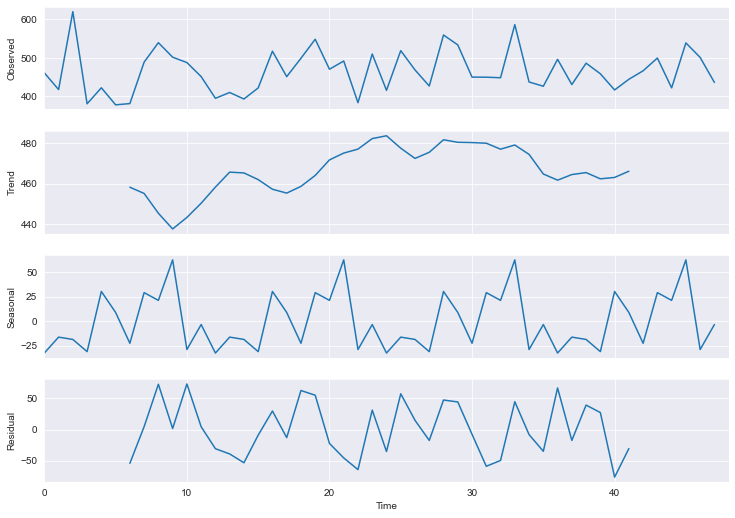

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = SalesQuantitiy.values
result = seasonal_decompose(series, model='additive', freq=12)

result.plot()
CurrentFig=plt.gcf()
CurrentFig.set_size_inches(11,8)
plt.show()

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
SarimaxModel = model = SARIMAX(SalesQuantitiy,  
                        order = (5, 1, 10),  
                        seasonal_order =(1, 0, 0, 12))
SalesModel = SarimaxModel.fit()

Next Six Month Forecast: 49    465.760917
50    457.274127
51    394.353727
52    506.867584
53    489.259814
54    475.955491
Name: Forecast, dtype: float64


<AxesSubplot:title={'center':'Time Series Sales Forecasts'}>

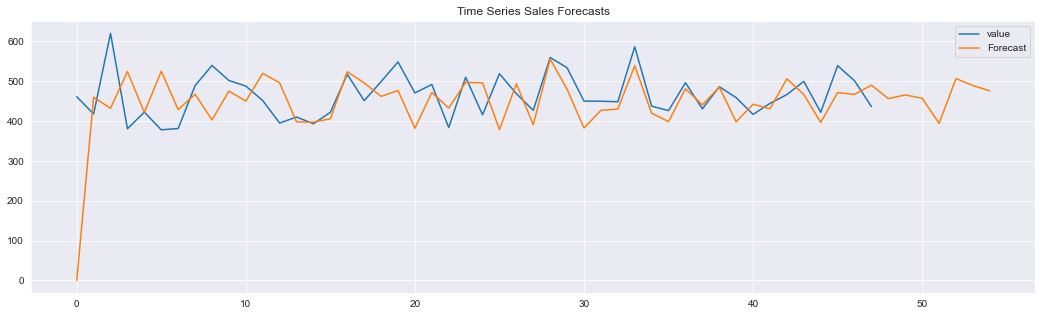

In [41]:
forecast = SalesModel.predict(start = 0,
                          end = (len(SalesQuantitiy)) + 6,
                          typ = 'levels').rename('Forecast')
print("Next Six Month Forecast:",forecast[-6:])
SalesQuantitiy.plot(figsize = (18, 5), legend = True, title='Time Series Sales Forecasts')
forecast.plot(legend = True, figsize=(18,5))

In [43]:
MAPE=np.mean(abs(SalesQuantitiy-forecast)/SalesQuantitiy)*100
print('#### Accuracy of model:', round(100-MAPE,2), '####')

# Printing month names in X-Axis
# MonthNames=MonthNames+MonthNames[0:6]
# plotLabels=plt.xticks(np.arange(0,54,1),MonthNames, rotation=30)

#### Accuracy of model: 87.81 ####


In [45]:
!pip install mlxtend

import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [46]:
data

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Product ID,Product Name,Sub-Category,Category,Sales,Quantity,Discount,Profit,Order Priority,City,Region,Order_Date,Ship_Date
0,IN-2017-CA120551-42816,Standard Class,CA-120551,Cathy Armstrong,Home Office,FUR-BO-4861,"Ikea Library with Doors, Mobile",Bookcases,Furniture,731.820,2,0.0,102.420,Medium,Henderson,South,2020-03-22,2020-03-29
1,ID-2015-BD116051-42248,Second Class,BD-116051,Brian Dahlen,Consumer,OFF-SU-2988,"Acme Scissors, Easy Grip",Supplies,Office Supplies,243.540,9,0.0,104.490,Medium,Henderson,South,2018-09-01,2018-09-04
2,IN-2017-CA120551-42816,Standard Class,CA-120551,Cathy Armstrong,Home Office,TEC-MA-4211,"Epson Receipt Printer, White",Machines,Technology,346.320,3,0.0,13.770,Medium,Los Angeles,West,2020-03-22,2020-03-29
3,IN-2017-CA120551-42816,Standard Class,CA-120551,Cathy Armstrong,Home Office,FUR-FU-5726,"Rubbermaid Door Stop, Erganomic",Furnishings,Furniture,169.680,4,0.0,79.680,Medium,Fort Lauderdale,South,2020-03-22,2020-03-29
4,ID-2015-BD116051-42248,Second Class,BD-116051,Brian Dahlen,Consumer,OFF-EN-3664,"Cameo Interoffice Envelope, with clear poly wi...",Envelopes,Office Supplies,203.880,4,0.0,24.360,Medium,Fort Lauderdale,South,2018-09-01,2018-09-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,ZA-2014-AS285147-41718,Standard Class,AS-285147,Alejandro Savely,Corporate,OFF-AR-5911,"Sanford Highlighters, Easy-Erase",Art,Office Supplies,9.612,2,0.7,-21.168,Medium,Lafayette,South,2017-03-20,2017-03-25
51286,ZA-2017-HG4965147-42876,Second Class,HG-4965147,Henry Goldwyn,Corporate,OFF-LA-3260,"Avery Color Coded Labels, 5000 Label Set",Labels,Office Supplies,4.104,1,0.7,-4.806,High,Lake Charles,South,2020-05-21,2020-05-23
51287,ZA-2016-EB3870147-42499,Standard Class,EB-3870147,Emily Burns,Consumer,OFF-AR-5922,"Sanford Pencil Sharpener, Fluorescent",Art,Office Supplies,7.749,1,0.7,-9.051,Medium,Richmond,South,2019-05-09,2019-05-15
51288,ZA-2015-JG5115147-42040,Standard Class,JG-5115147,Jack Garza,Consumer,TEC-MA-5542,"Panasonic Card Printer, Durable",Machines,Technology,104.364,2,0.7,-173.976,Medium,Lafayette,South,2018-02-05,2018-02-10


In [5]:
!pip install fbprophet


  Using cached https://files.pythonhosted.org/packages/1a/b5/9c3fefa8a7b839729df57deedf0a69815841dfb88f0df911f34d998230b7/fbprophet-0.7.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/e3/e2/204c9c6beaf9e05ad28bd589c154afff35dffa6166d76841d3c0dec6c1e3/cmdstanpy-0.9.5-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/56/57/948017bc757f883e44bbb17f4a1489d15a013dd4db205c6519a60707ea2a/pystan-3.2.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/81/87/0c8592b31a6e19106699740f4a5ff33d60d0f365363168cf319d0fbe4950/pandas-1.3.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/ab/e0/a52ffc02395474858552ca6437226e23ad67e25fd85cb387f02e479cfe01/LunarCalendar-0.0.9-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/1b/fa/b5f5d8b3a328c930a190540231fe79e854a416df62c57329630823f3941e/convertdate-2.3.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bc/46/a471d65

ERROR: Could not find a version that satisfies the requirement httpstan<4.6,>=4.5 (from pystan>=2.14->fbprophet) (from versions: 0.2.5, 0.3.0, 0.3.1, 0.4.0, 0.5.0, 0.6.0, 0.7.2, 0.7.3, 0.7.5, 0.7.6, 0.8.0, 0.9.0, 0.10.1, 1.0.0)
ERROR: No matching distribution found for httpstan<4.6,>=4.5 (from pystan>=2.14->fbprophet)


In [2]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'